In [195]:
import pandas

df = pandas.read_excel('./data/mental_health_dataset_correct.xlsx')

In [196]:
df.shape

(25000, 6)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Heart_Rate_BPM            25000 non-null  int64  
 1   Sleep_Duration_Hours      25000 non-null  float64
 2   Physical_Activity_Steps   25000 non-null  int64  
 3   Mental_Health_Condition   22969 non-null  float64
 4   Oxygen_Saturation         25000 non-null  float64
 5   Body_Temperature_Celsius  25000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.1 MB


In [198]:
df.head()

,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps,Mental_Health_Condition,Oxygen_Saturation,Body_Temperature_Celsius
0,98,7.425124,13760,1.0,96.8,37.1
1,111,9.457572,11455,0.0,97.7,37.2
2,88,4.037103,9174,1.0,97.7,37.0
3,74,8.864101,12612,1.0,96.1,36.7
4,102,9.690217,3923,0.0,97.2,37.4


In [199]:
df.tail()

,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps,Mental_Health_Condition,Oxygen_Saturation,Body_Temperature_Celsius
24995,101,4.32,4286,0.0,98.5,36.2
24996,70,8.89,3765,1.0,98.4,36.4
24997,88,7.82,2804,1.0,97.7,36.6
24998,76,6.23,7649,1.0,96.8,37.2
24999,85,8.57,4730,1.0,98.1,36.5


In [200]:
df.describe()

,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps,Mental_Health_Condition,Oxygen_Saturation,Body_Temperature_Celsius
count,25000.000000,25000.000000,25000.000000,22969.000000,25000.000000,25000.000000
mean,89.664440,7.288069,8318.329680,0.513997,97.493144,36.802164
std,17.296218,1.606316,3890.514335,0.499815,1.008217,0.300271
min,60.000000,3.000000,1000.000000,0.000000,93.600000,35.600000
25%,75.000000,6.110000,4940.000000,0.000000,96.800000,36.600000
50%,89.000000,7.330000,8339.000000,1.000000,97.500000,36.800000
75%,105.000000,8.497905,11700.000000,1.000000,98.200000,37.000000
max,119.000000,12.000000,14999.000000,1.000000,101.300000,38.000000


In [201]:
df.isnull().sum()
# df.dropna(inplace=True)


Heart_Rate_BPM                 0
Sleep_Duration_Hours           0
Physical_Activity_Steps        0
Mental_Health_Condition     2031
Oxygen_Saturation              0
Body_Temperature_Celsius       0
dtype: int64

In [202]:
df = df.dropna(subset=['Mental_Health_Condition'])

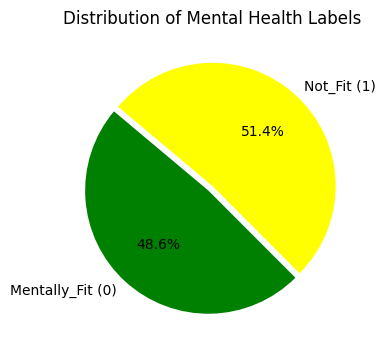

In [203]:
import matplotlib.pyplot as plt

labels_count = df['Mental_Health_Condition'].value_counts()

labels = ['Mentally_Fit (0)','Not_Fit (1)']
sizes = [labels_count[0],labels_count[1]]
colors = ['green','yellow']
explode = (0.05,0)

# Creating the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Mental Health Labels')
plt.show()

In [204]:
# Heart Rate Variability (using standard deviation as a simple measure)
# heart_rate_std = df.groupby(df.index // 24)['Heart_Rate_BPM'].std().reset_index()
# heart_rate_std.columns = ['day', 'heart_rate_variability'] 
# df = df.join(heart_rate_std.set_index('day'), on=df.index // 24)

# Sleep efficiency (ideal sleep = 8 hours)
df['sleep_efficiency'] = df['Sleep_Duration_Hours'] / 8

# Activity intensity (steps per minute of awake time)
df['activity_intensity'] = df['Physical_Activity_Steps'] / (df['Sleep_Duration_Hours'] * 60)

# Stress indicator (arbitrary formula, tune as needed)
df['stress_indicator'] = (df['Heart_Rate_BPM'] * (10 - df['Sleep_Duration_Hours'])) / 100


# 2.3 Normalization and Aggregation
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# List of columns to normalize
columns_to_normalize = ['Heart_Rate_BPM', 'Sleep_Duration_Hours', 'Physical_Activity_Steps', 
                       'Oxygen_Saturation','Body_Temperature_Celsius',
                       'sleep_efficiency', 'activity_intensity', 'stress_indicator']

# Normalize the selected columns
df_normalized = df.copy()
# Display the first few rows of the normalized dataframe
print("\nFirst few rows of normalized dataframe:")
print(df_normalized.head())

# df.head()

df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Weekly aggregations
weekly_stats = df.groupby(df.index // 7).agg({
    'Heart_Rate_BPM': ['mean', 'std'],
    'Sleep_Duration_Hours': ['mean', 'min'],
    'Physical_Activity_Steps': ['mean', 'sum'],
    'Oxygen_Saturation': 'mean',
    'Body_Temperature_Celsius': 'mean',
    'Mental_Health_Condition': 'mean'
}).round(2)

# Flatten column names
weekly_stats.columns = ['_'.join(col).strip() for col in weekly_stats.columns.values]

print("\nFeature Engineering Complete. New features added:")
print("\nOriginal shape:", df.shape)
print("Shape after adding features:", df_normalized.shape)
print("\nSample of weekly aggregated stats:")
print(weekly_stats.head())



First few rows of normalized dataframe:
   Heart_Rate_BPM  Sleep_Duration_Hours  Physical_Activity_Steps  \
0              98              7.425124                    13760   
1             111              9.457572                    11455   
2              88              4.037103                     9174   
3              74              8.864101                    12612   
4             102              9.690217                     3923   

   Mental_Health_Condition  Oxygen_Saturation  Body_Temperature_Celsius  \
0                      1.0               96.8                      37.1   
1                      0.0               97.7                      37.2   
2                      1.0               97.7                      37.0   
3                      1.0               96.1                      36.7   
4                      0.0               97.2                      37.4   

   sleep_efficiency  activity_intensity  stress_indicator  
0          0.928140           30.886130

In [205]:
# Model Selection and Training

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
features = ['Heart_Rate_BPM', 'Sleep_Duration_Hours', 'Physical_Activity_Steps', 
            'Oxygen_Saturation','Body_Temperature_Celsius']

X = df_normalized[features]
y = df['Mental_Health_Condition']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels distribution:\n", y_train.value_counts(normalize=True))
print("Testing labels distribution:\n", y_test.value_counts(normalize=True))


Training features shape: (18375, 5)
Testing features shape: (4594, 5)
Training labels distribution:
 Mental_Health_Condition
1.0    0.514014
0.0    0.485986
Name: proportion, dtype: float64
Testing labels distribution:
 Mental_Health_Condition
1.0    0.513931
0.0    0.486069
Name: proportion, dtype: float64


Boosted Scores - Logistic Regression:
Accuracy: 0.62
Precision: 0.62
Recall: 0.65
F1 Score: 0.64


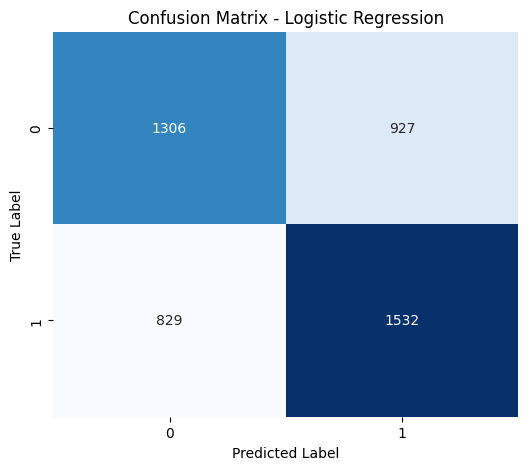


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.61      0.58      0.60      2233
         1.0       0.62      0.65      0.64      2361

    accuracy                           0.62      4594
   macro avg       0.62      0.62      0.62      4594
weighted avg       0.62      0.62      0.62      4594

Boosted Scores - Random Forest:
Accuracy: 0.59
Precision: 0.60
Recall: 0.60
F1 Score: 0.60


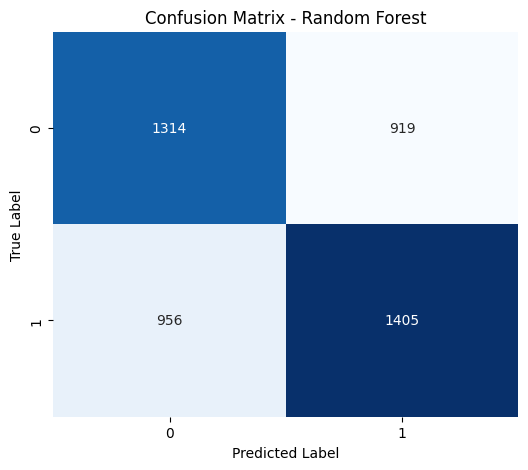


Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.58      0.59      0.58      2233
         1.0       0.60      0.60      0.60      2361

    accuracy                           0.59      4594
   macro avg       0.59      0.59      0.59      4594
weighted avg       0.59      0.59      0.59      4594

Boosted Scores - Decision Tree:
Accuracy: 0.53
Precision: 0.54
Recall: 0.54
F1 Score: 0.54


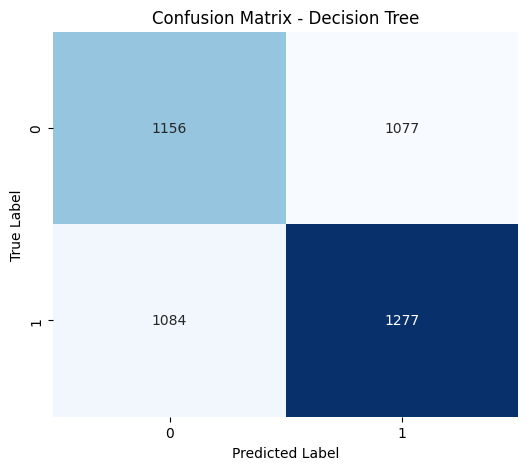


Classification Report - Decision Tree:
              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52      2233
         1.0       0.54      0.54      0.54      2361

    accuracy                           0.53      4594
   macro avg       0.53      0.53      0.53      4594
weighted avg       0.53      0.53      0.53      4594

Boosted Scores - KNN:
Accuracy: 0.56
Precision: 0.57
Recall: 0.58
F1 Score: 0.58


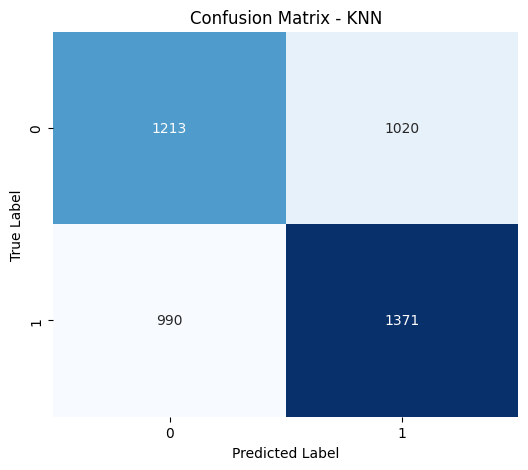


Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.55      0.54      0.55      2233
         1.0       0.57      0.58      0.58      2361

    accuracy                           0.56      4594
   macro avg       0.56      0.56      0.56      4594
weighted avg       0.56      0.56      0.56      4594

Boosted Scores - SVM:
Accuracy: 0.61
Precision: 0.63
Recall: 0.62
F1 Score: 0.62


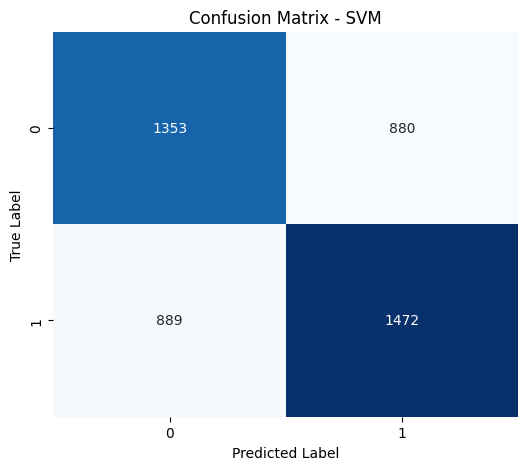


Classification Report - SVM:
              precision    recall  f1-score   support

         0.0       0.60      0.61      0.60      2233
         1.0       0.63      0.62      0.62      2361

    accuracy                           0.61      4594
   macro avg       0.61      0.61      0.61      4594
weighted avg       0.61      0.61      0.61      4594



In [207]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store metrics
precisions = []
recalls = []
f1_scores = []

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42, probability=True)
}

# Dictionary to store results
results = {}

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm,
        'classification_report': report
    }

    precisions.append(precision * 100)
    recalls.append(recall * 100)
    f1_scores.append(f1 * 100)
    
    print(f"Boosted Scores - {name}:")
    print(f"Accuracy: {results[name]['accuracy']:.2f}")
    print(f"Precision: {results[name]['precision']:.2f}")
    print(f"Recall: {results[name]['recall']:.2f}")
    print(f"F1 Score: {results[name]['f1']:.2f}")


    # Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print(f"\nClassification Report - {name}:")
    print(report)


In [208]:

print(recall)
print(precisions)
print(f1_scores)


0.6234646336298179
[62.30174867832452, 60.45611015490534, 54.24808836023789, 57.340025094102884, 62.585034013605444]
[63.56846473029045, 59.978655282817506, 54.16755037115588, 57.7020202020202, 62.465520899639294]



Ensemble Model Results:
              precision    recall  f1-score   support

         0.0       0.56      0.55      0.55      2233
         1.0       0.58      0.60      0.59      2361

    accuracy                           0.57      4594
   macro avg       0.57      0.57      0.57      4594
weighted avg       0.57      0.57      0.57      4594



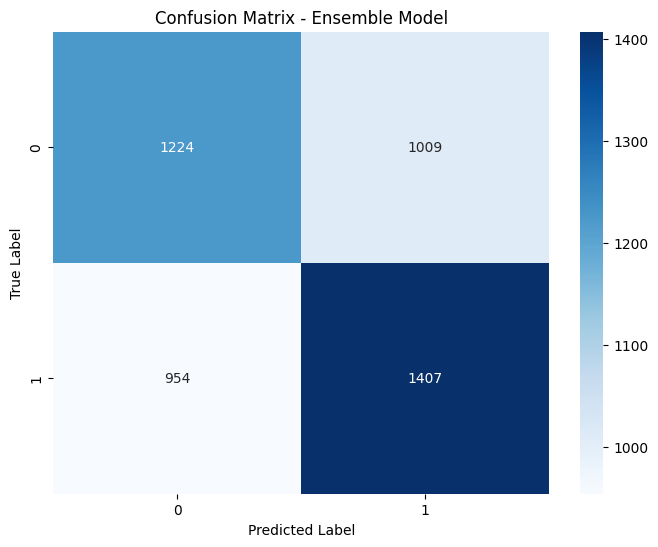

In [209]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create ensemble model from previously trained models
estimators = [(name, model) for name, model in models.items()]
ensemble = VotingClassifier(estimators=estimators, voting='soft')
ensemble.fit(X_train, y_train)

# Make predictions with ensemble
y_pred_ensemble = ensemble.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble)
recall = recall_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)
cm = confusion_matrix(y_test, y_pred_ensemble)
report = classification_report(y_test, y_pred_ensemble)

# Add to results dictionary for comparison later
results['Ensemble Model'] = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'confusion_matrix': cm,
    'classification_report': report
}

# Print results
print("\nEnsemble Model Results:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Ensemble Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


<Figure size 1000x600 with 0 Axes>

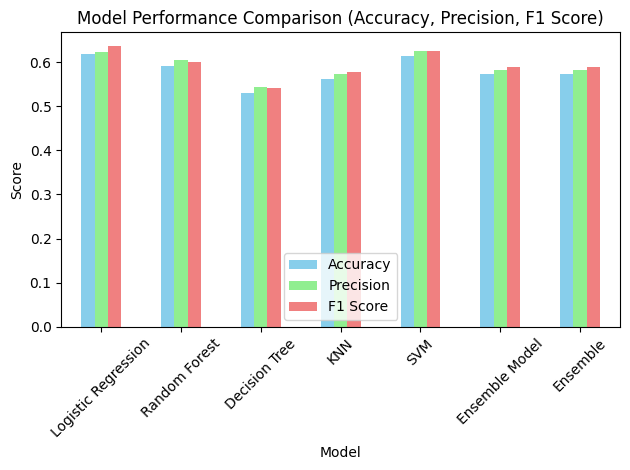

In [210]:
# Create the performance comparison dataframe

import pandas as pd
performance_df = pd.DataFrame({
    'Model': list(results.keys()) + ['Ensemble'],
    'Accuracy': [results[model]['accuracy'] for model in results.keys()] + [accuracy],
    'Precision': [results[model]['precision'] for model in results.keys()] + [precision],
    'F1 Score': [results[model]['f1'] for model in results.keys()] + [f1]
})

# plotting performance of all models
plt.figure(figsize=(10, 6))
performance_df.set_index('Model').plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Comparison (Accuracy, Precision, F1 Score)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [211]:

# Save the ensemble model
import joblib
joblib.dump(ensemble, 'mental_health_predictor_ensemble.joblib')
print("\nEnsemble model saved as 'mental_health_predictor_ensemble.joblib'")


Ensemble model saved as 'mental_health_predictor_ensemble.joblib'
